In [103]:
!pip install  numpy pandas tensorflow scikit-learn matplotlib plotly seaborn

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer



In [105]:
df = pd.read_csv(r"C:\Users\dhruv\Downloads\Phishing_Email.csv")

In [106]:
df.head() #show first 5 enteries

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [108]:
df.isnull().sum() #looks for null value counts of columns

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [109]:
#df.drop(["Unnamed: 0"],axis=1,inplace=True) #Removes the column "unmaed:0 " or inde
df.dropna(inplace=True,axis=0) #removes any row that contain missing values nan
df.drop_duplicates(inplace=True) #removes duplicate row from the dataframe

In [110]:
plot = df['Email Type'].value_counts()

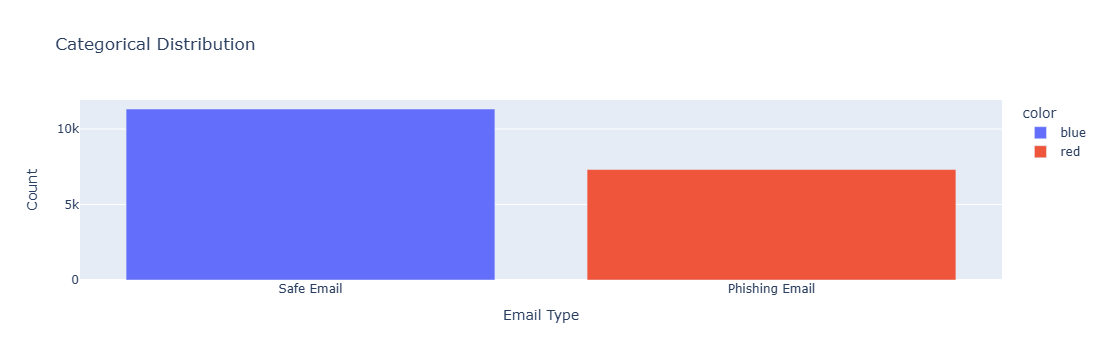

In [111]:
fig = px.bar(plot, x=plot.index,
             y=plot.values,
             color=['blue','red'], labels={'x': 'Category', 'y':'Count'},
             title="Categorical Distribution")
fig.show()

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [113]:
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,1,the other side of * galicismos * * galicismo *...,1
2,2,re : equistar deal tickets are you still avail...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,0
4,4,software at incredibly low prices ( 86 % lower...,0
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,0
18646,18647,request submitted : access request for anita ....,1
18647,18648,"re : important - prc mtg hi dorn & john , as y...",1
18648,18649,press clippings - letter on californian utilit...,1


In [114]:
import re

def preprocess_text(text):
    #Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    #Remove punctuations
    text = re.sub(r'[^\W\S]', '', text)
    
    #Convert to lowercase
    text = text.lower()

    #remove extra space
    text = re.sub(r'\s+', '' , text).strip()
    return text

#applying the preprocess_text function to the specified column
df["Email Text"] = df["Email Text"].apply(preprocess_text) 

In [115]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re:6.1100,disc:uniformitarianism,re:1086;sex/l...",1
1,1,theothersideof*galicismos**galicismo*isaspanis...,1
2,2,re:equistardealticketsareyoustillavailabletoas...,1
3,3,helloiamyourhotlilhornytoy.iamtheoneyoudreamab...,0
4,4,softwareatincrediblylowprices(86%lower).draper...,0
5,5,globalriskmanagementoperationssallycongratulat...,1
6,6,"onsun,aug11,2002at11:17:47am+0100,wintermuteme...",1
7,7,"entourage,stockmogulnewsletterralphvelez,genex...",0
8,8,"weoweyoulotsofmoneydearapplicant,afterfurtherr...",0
9,9,re:coastaldeal-withexxonparticipationunderthep...,1


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into vectors using TfidfVectorizer
tf = TfidfVectorizer(stop_words="english", max_features=10000)

feature_x = tf.fit_transform(df["Email Text"]).toarray()


In [117]:
y_tf = np.array(df['Email Type']) #convert the lable into numpy array

In [118]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

In [119]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix


accuracy from logistic regression:92.38 %
f1 score from logistic regression:93.61 %
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1457
           1       0.96      0.92      0.94      2270

    accuracy                           0.92      3727
   macro avg       0.92      0.93      0.92      3727
weighted avg       0.93      0.92      0.92      3727



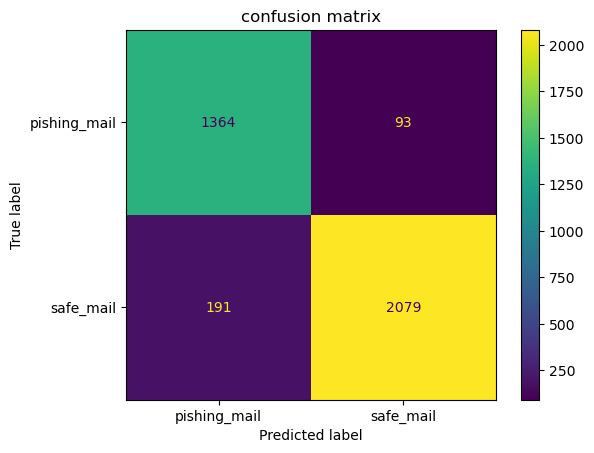

In [120]:
from sklearn.linear_model import LogisticRegression # (to do:- sameway use random forest)

#logisticregression model

lg = LogisticRegression()
lg.fit(x_train,y_train)

#prediction
pred_lg = lg.predict(x_test)

#performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_test,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression:{f1_score(y_test,pred_lg)*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_lg))

clf_lg = confusion_matrix(y_test,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail', 'safe_mail']).plot()
plt.title("confusion matrix")
plt.show()


Accuracy from Random Forest: 91.41 %
F1 Score from Random Forest: 92.71 %
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1457
           1       0.96      0.90      0.93      2270

    accuracy                           0.91      3727
   macro avg       0.91      0.92      0.91      3727
weighted avg       0.92      0.91      0.91      3727



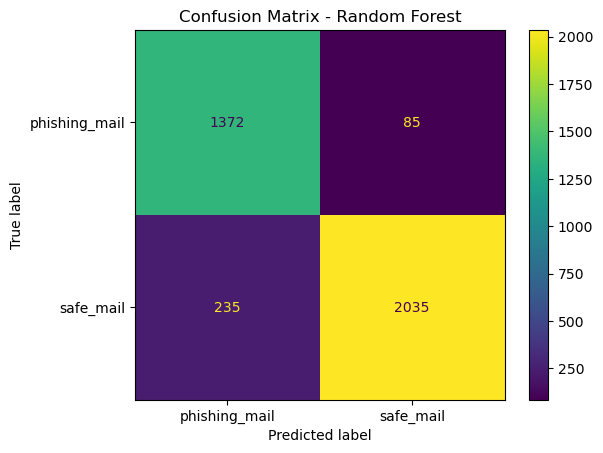

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Prediction
pred_rf = rf.predict(x_test)

# Performance
print("")
print(f"Accuracy from Random Forest: {accuracy_score(y_test, pred_rf)*100:.2f} %")
print(f"F1 Score from Random Forest: {f1_score(y_test, pred_rf)*100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_rf))

# Confusion Matrix
clf_rf = confusion_matrix(y_test, pred_rf)
cx_ = ConfusionMatrixDisplay(clf_rf, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()



Accuracy from MLP: 91.33 %
F1 Score from MLP: 92.66 %
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.89      1457
           1       0.96      0.90      0.93      2270

    accuracy                           0.91      3727
   macro avg       0.91      0.92      0.91      3727
weighted avg       0.92      0.91      0.91      3727



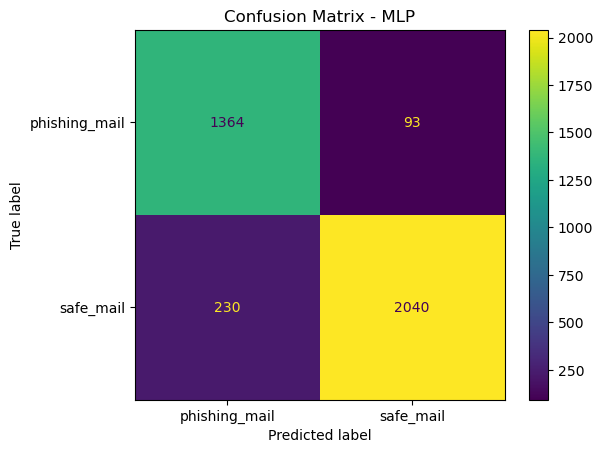

In [122]:
#multilayer perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Multilayer Perceptron model
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

# Prediction
pred_mlp = mlp.predict(x_test)

# Performance
print("")
print(f"Accuracy from MLP: {accuracy_score(y_test, pred_mlp)*100:.2f} %")
print(f"F1 Score from MLP: {f1_score(y_test, pred_mlp)*100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_mlp))

# Confusion Matrix
clf_mlp = confusion_matrix(y_test, pred_mlp)
ConfusionMatrixDisplay(clf_mlp, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - MLP")
plt.show()
